# English Premier League (EPL) Pythagorean Predictor

## 피타고라스 기대치 확인

피타고라스 기대치 공식 = 스포츠 팀의 승률이 (득점^2) / [(득점^2) + (실점^2)] 와 비례한다는 공식

2017, 2018 EPL 경기 기록 데이터를 통해 팀의 승률과 피타고라스 기대치 값의 상관 관계를 분석

아래 순서대로 데이터 처리:

1. Load the datafile (this contains 6 variables: the date, home team, away team, goals scored (FTHG), goals against (FTAG) andthe result (H- home win, D- draw, A – away win).

2. Create a value for a home wins (win= 1, draw=0.5, loss= 0) and away wins and a count variable for each game (=1).

3. Create a file for games played in 2017 (before date 20180000) and another one for games played in 2018 (after date 20180000). For the 2017 games, use .groupby to create a dataframe aggregating by home team the variables for count, home wins, goals for and goals against.  Then, use .groupby to  create a separate dataframe aggregating by away team the variables for count, away wins, goals for and goals against. Rename the variables to denote whether they are aggregates for home team or away team.

4. Then merge the home and away dataframes.

5. Sum the values of home and away wins, games, goals for and goals against, then create the values for win percentage (wpc) and the Pythagorean expectation (pyth). 

6. Now repeat steps 4-6 for the 2018 games. Be sure to give different names for wpc and pyth in 2017 and 2018.

7. Now merge 2017 and 2018 summary files.

8. Now generate a correlation matrix for the wpc and pyth variables for 2017 and 2018

## Step 1

In [1]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


In [3]:
EPL18

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H
...,...,...,...,...,...,...
375,20180513,Newcastle,Chelsea,3,0,H
376,20180513,Southampton,Man City,0,1,A
377,20180513,Swansea,Stoke,1,2,A
378,20180513,Tottenham,Leicester,5,4,H


## Step 2

In [4]:
EPL18['home_wins']=np.where(EPL18.FTHG > EPL18.FTAG, 1, 0)
EPL18['home_wins']=np.where(EPL18.FTHG == EPL18.FTAG, 0.5, EPL18['home_wins'])
EPL18['away_wins']=np.where(EPL18.FTHG < EPL18.FTAG, 1, 0)
EPL18['away_wins']=np.where(EPL18.FTHG == EPL18.FTAG, 0.5, EPL18['away_wins'])
EPL18['count']=1

EPL18.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,home_wins,away_wins,count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1


## Step 3

In [5]:
EPL18_17 = EPL18[EPL18['Date']<20180000]
EPL18_18 = EPL18[EPL18['Date']>20180000]

EPL18_17_h = EPL18_17[['HomeTeam','count','home_wins','away_wins','FTHG','FTAG']].groupby('HomeTeam').sum().reset_index()
EPL18_17_a = EPL18_17[['AwayTeam','count','away_wins','home_wins','FTAG','FTHG']].groupby('AwayTeam').sum().reset_index()

EPL18_17_h = EPL18_17_h.rename(columns={'HomeTeam':'team', 'count':'count_h','home_wins':'W_h', 'away_wins':'L_h', 'FTHG':'GF_h', 'FTAG':'GA_h'})
EPL18_17_a = EPL18_17_a.rename(columns={'AwayTeam':'team', 'count':'count_a','home_wins':'L_a', 'away_wins':'W_a', 'FTHG':'GA_a', 'FTAG':'GF_a'})


In [6]:
EPL18_18

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,home_wins,away_wins,count
209,20180101,Brighton,Bournemouth,2,2,D,0.5,0.5,1
210,20180101,Burnley,Liverpool,1,2,A,0.0,1.0,1
211,20180101,Everton,Man United,0,2,A,0.0,1.0,1
212,20180101,Leicester,Huddersfield,3,0,H,1.0,0.0,1
213,20180101,Stoke,Newcastle,0,1,A,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
375,20180513,Newcastle,Chelsea,3,0,H,1.0,0.0,1
376,20180513,Southampton,Man City,0,1,A,0.0,1.0,1
377,20180513,Swansea,Stoke,1,2,A,0.0,1.0,1
378,20180513,Tottenham,Leicester,5,4,H,1.0,0.0,1


## Step 4 (home team)

In [7]:
EPL18_17_total = pd.merge(EPL18_17_h, EPL18_17_a, on='team')
EPL18_17_total

,team,count_h,W_h,L_h,GF_h,GA_h,count_a,W_a,L_a,GF_a,GA_a
0,Arsenal,10,8.5,1.5,25,10,11,5.0,6.0,13,16
1,Bournemouth,11,4.5,6.5,14,17,10,3.0,7.0,6,15
2,Brighton,10,5.5,4.5,10,12,11,3.0,8.0,5,13
3,Burnley,10,6.0,4.0,7,6,11,6.5,4.5,11,11
4,Chelsea,11,8.5,2.5,21,7,10,7.0,3.0,18,7
5,Crystal Palace,11,5.0,6.0,14,18,10,2.5,7.5,4,14
6,Everton,10,6.5,3.5,17,13,11,3.5,7.5,8,19
7,Huddersfield,11,6.0,5.0,10,12,10,3.0,7.0,8,20
8,Leicester,10,5.0,5.0,13,14,11,5.0,6.0,18,18
9,Liverpool,11,8.5,2.5,21,4,10,6.5,3.5,27,20


## Step 5 (home team)

In [8]:
EPL18_17_total['G'] = EPL18_17_total['count_h']+EPL18_17_total['count_a']
EPL18_17_total['W'] = EPL18_17_total['W_h']+EPL18_17_total['W_a']
EPL18_17_total['goal'] = EPL18_17_total['GF_h']+EPL18_17_total['GF_a']
EPL18_17_total['goal_against'] = EPL18_17_total['GA_h']+EPL18_17_total['GA_a']
EPL18_17_total['wpc17'] = EPL18_17_total['W'] / EPL18_17_total['G']
EPL18_17_total['pyth17'] = EPL18_17_total['goal']**2/(EPL18_17_total['goal']**2 + EPL18_17_total['goal_against']**2)
EPL18_17_total

,team,count_h,W_h,L_h,GF_h,GA_h,count_a,W_a,L_a,GF_a,GA_a,G,W,goal,goal_against,wpc17,pyth17
0,Arsenal,10,8.5,1.5,25,10,11,5.0,6.0,13,16,21,13.5,38,26,0.642857,0.681132
1,Bournemouth,11,4.5,6.5,14,17,10,3.0,7.0,6,15,21,7.5,20,32,0.357143,0.280899
2,Brighton,10,5.5,4.5,10,12,11,3.0,8.0,5,13,21,8.5,15,25,0.404762,0.264706
3,Burnley,10,6.0,4.0,7,6,11,6.5,4.5,11,11,21,12.5,18,17,0.595238,0.528548
4,Chelsea,11,8.5,2.5,21,7,10,7.0,3.0,18,7,21,15.5,39,14,0.738095,0.885847
5,Crystal Palace,11,5.0,6.0,14,18,10,2.5,7.5,4,14,21,7.5,18,32,0.357143,0.240356
6,Everton,10,6.5,3.5,17,13,11,3.5,7.5,8,19,21,10.0,25,32,0.476190,0.379018
7,Huddersfield,11,6.0,5.0,10,12,10,3.0,7.0,8,20,21,9.0,18,32,0.428571,0.240356
8,Leicester,10,5.0,5.0,13,14,11,5.0,6.0,18,18,21,10.0,31,32,0.476190,0.484131
9,Liverpool,11,8.5,2.5,21,4,10,6.5,3.5,27,20,21,15.0,48,24,0.714286,0.800000


In [9]:
EPL18_17_total.corr()

,count_h,W_h,L_h,GF_h,GA_h,count_a,W_a,L_a,GF_a,GA_a,G,W,goal,goal_against,wpc17,pyth17
count_h,1.000000,0.067765,0.239592,0.016573,0.066344,-0.860987,-0.063979,-0.143580,-0.040874,-0.275918,0.537186,-0.001136,-0.011717,-0.128445,-0.019257,0.044273
W_h,0.067765,1.000000,-0.952406,0.871576,-0.773699,-0.053531,0.803521,-0.811452,0.706865,-0.474910,0.044385,0.944840,0.857689,-0.740153,0.944442,0.918217
L_h,0.239592,-0.952406,1.000000,-0.843077,0.773165,-0.210970,-0.801463,0.745764,-0.700346,0.377838,0.120937,-0.919781,-0.838206,0.681006,-0.924930,-0.880000
GF_h,0.016573,0.871576,-0.843077,1.000000,-0.491662,-0.022443,0.777326,-0.777938,0.709067,-0.469320,-0.004652,0.865864,0.931462,-0.571882,0.866969,0.843559
GA_h,0.066344,-0.773699,0.773165,-0.491662,1.000000,-0.023482,-0.702713,0.692734,-0.589680,0.410472,0.091424,-0.775606,-0.582346,0.833397,-0.779778,-0.769481
count_a,-0.860987,-0.053531,-0.210970,-0.022443,-0.023482,1.000000,0.095374,0.145826,-0.033057,0.224526,-0.033501,0.025566,-0.029750,0.122355,0.022818,-0.098384
W_a,-0.063979,0.803521,-0.801463,0.777326,-0.702713,0.095374,1.000000,-0.970892,0.842582,-0.632278,0.032443,0.954171,0.874409,-0.794032,0.952932,0.912052
L_a,-0.143580,-0.811452,0.745764,-0.777938,0.692734,0.145826,-0.970892,1.000000,-0.845346,0.682408,-0.040304,-0.942143,-0.876181,0.818582,-0.941572,-0.930107
GF_a,-0.040874,0.706865,-0.700346,0.709067,-0.589680,-0.033057,0.842582,-0.845346,1.000000,-0.256026,-0.135136,0.818965,0.917027,-0.499910,0.824177,0.854309
GA_a,-0.275918,-0.474910,0.377838,-0.469320,0.410472,0.224526,-0.632278,0.682408,-0.256026,1.000000,-0.169837,-0.586642,-0.397550,0.846056,-0.583087,-0.582101


## Step 6 (home team)

In [10]:
EPL18_17_total['diff']=(EPL18_17_total['wpc17']-EPL18_17_total['pyth17'])**2
EPL18_17_total['gap']=EPL18_17_total['W_h']-EPL18_17_total['W_a']
EPL18_17_total.sort_values(by=['GF_h'])

,team,count_h,W_h,L_h,GF_h,GA_h,count_a,W_a,L_a,GF_a,GA_a,G,W,goal,goal_against,wpc17,pyth17,diff,gap
15,Swansea,10,3.0,7.0,6,15,11,3.0,8.0,7,17,21,6.0,13,32,0.285714,0.141660,0.020752,0.0
3,Burnley,10,6.0,4.0,7,6,11,6.5,4.5,11,11,21,12.5,18,17,0.595238,0.528548,0.004448,-0.5
12,Newcastle,11,4.0,7.0,9,13,10,3.0,7.0,10,17,21,7.0,19,30,0.333333,0.286281,0.002214,1.0
19,West Ham,9,4.0,5.0,10,14,11,3.0,8.0,12,24,20,7.0,22,38,0.350000,0.251037,0.009794,1.0
2,Brighton,10,5.5,4.5,10,12,11,3.0,8.0,5,13,21,8.5,15,25,0.404762,0.264706,0.019616,2.5
7,Huddersfield,11,6.0,5.0,10,12,10,3.0,7.0,8,20,21,9.0,18,32,0.428571,0.240356,0.035425,3.0
18,West Brom,11,4.5,6.5,10,15,10,2.5,7.5,5,13,21,7.0,15,28,0.333333,0.222993,0.012175,2.0
8,Leicester,10,5.0,5.0,13,14,11,5.0,6.0,18,18,21,10.0,31,32,0.476190,0.484131,0.000063,0.0
13,Southampton,11,5.0,6.0,13,15,10,3.0,7.0,7,15,21,8.0,20,30,0.380952,0.307692,0.005367,2.0
14,Stoke,10,5.0,5.0,13,19,11,2.5,8.5,10,27,21,7.5,23,46,0.357143,0.200000,0.024694,2.5


## Plotting

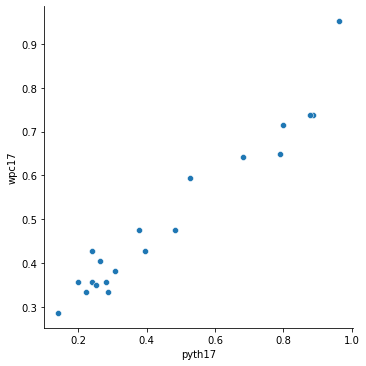

In [11]:
# Plot the data

sns.relplot(x="pyth17", y="wpc17", data =EPL18_17_total)

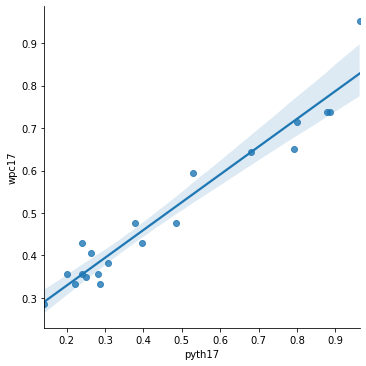

In [23]:
sns.lmplot(x="pyth17", y="wpc17", data =EPL18_17_total)

In [12]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc17 ~ pyth17', data=EPL18_17_total).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc17   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           2.81e-12
Time:                        00:54:31   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth17         0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 7 (=Step 4 (away team))

In [13]:
EPL18_18_h = EPL18_18[['HomeTeam','count','home_wins','away_wins','FTHG','FTAG']].groupby('HomeTeam').sum().reset_index()
EPL18_18_a = EPL18_18[['AwayTeam','count','away_wins','home_wins','FTAG','FTHG']].groupby('AwayTeam').sum().reset_index()

EPL18_18_h = EPL18_18_h.rename(columns={'HomeTeam':'team', 'count':'count_h','home_wins':'W_h', 'away_wins':'L_h', 'FTHG':'GF_h', 'FTAG':'GA_h'})
EPL18_18_a = EPL18_18_a.rename(columns={'AwayTeam':'team', 'count':'count_a','home_wins':'L_a', 'away_wins':'W_a', 'FTHG':'GA_a', 'FTAG':'GF_a'})

## Step 7 (=Step 5 (away team))

In [14]:
EPL18_18_total = pd.merge(EPL18_18_h, EPL18_18_a, on='team')
EPL18_18_total

,team,count_h,W_h,L_h,GF_h,GA_h,count_a,W_a,L_a,GF_a,GA_a
0,Arsenal,9,7.5,1.5,29,10,8,1.0,7.0,7,15
1,Bournemouth,8,5.0,3.0,12,13,9,4.0,5.0,13,16
2,Brighton,9,5.5,3.5,14,13,8,1.5,6.5,5,16
3,Burnley,9,3.5,5.5,9,11,8,4.0,4.0,9,11
4,Chelsea,8,4.5,3.5,9,9,9,4.5,4.5,14,15
5,Crystal Palace,8,4.5,3.5,15,9,9,4.5,4.5,12,14
6,Everton,9,5.5,3.5,11,9,8,2.5,5.5,8,17
7,Huddersfield,8,2.5,5.5,6,13,9,2.5,6.5,4,13
8,Leicester,9,5.0,4.0,12,8,8,2.5,5.5,13,20
9,Liverpool,8,7.0,1.0,24,6,9,5.0,4.0,12,8


## Step 7 (=Step 6 (away team))

In [15]:
EPL18_18_total['G'] = EPL18_18_total['count_h']+EPL18_18_total['count_a']
EPL18_18_total['W'] = EPL18_18_total['W_h']+EPL18_18_total['W_a']
EPL18_18_total['goal'] = EPL18_18_total['GF_h']+EPL18_18_total['GF_a']
EPL18_18_total['goal_against'] = EPL18_18_total['GA_h']+EPL18_18_total['GA_a']
EPL18_18_total['wpc18'] = EPL18_18_total['W'] / EPL18_18_total['G']
EPL18_18_total['pyth18'] = EPL18_18_total['goal']**2/(EPL18_18_total['goal']**2 + EPL18_18_total['goal_against']**2)
EPL18_18_total['gap']=(EPL18_18_total['W_h']-EPL18_18_total['W_a'])**2
EPL18_18_total.sort_values(by=['gap'])

,team,count_h,W_h,L_h,GF_h,GA_h,count_a,W_a,L_a,GF_a,GA_a,G,W,goal,goal_against,wpc18,pyth18,gap
4,Chelsea,8,4.5,3.5,9,9,9,4.5,4.5,14,15,17,9.0,23,24,0.529412,0.478733,0.00
5,Crystal Palace,8,4.5,3.5,15,9,9,4.5,4.5,12,14,17,9.0,27,23,0.529412,0.579491,0.00
7,Huddersfield,8,2.5,5.5,6,13,9,2.5,6.5,4,13,17,5.0,10,26,0.294118,0.128866,0.00
3,Burnley,9,3.5,5.5,9,11,8,4.0,4.0,9,11,17,7.5,18,22,0.441176,0.400990,0.25
18,West Brom,8,3.0,5.0,11,14,9,2.5,6.5,5,14,17,5.5,16,28,0.323529,0.246154,0.25
14,Stoke,9,2.5,6.5,7,11,8,3.0,5.0,5,11,17,5.5,12,22,0.323529,0.229299,0.25
1,Bournemouth,8,5.0,3.0,12,13,9,4.0,5.0,13,16,17,9.0,25,29,0.529412,0.426330,1.00
16,Tottenham,9,7.5,1.5,19,8,9,6.5,2.5,16,8,18,14.0,35,16,0.777778,0.827144,1.00
10,Man City,9,7.5,1.5,25,7,8,6.5,1.5,20,8,17,14.0,45,15,0.823529,0.900000,1.00
11,Man United,8,7.0,1.0,14,4,9,5.5,3.5,11,8,17,12.5,25,12,0.735294,0.812744,2.25


## Plotting

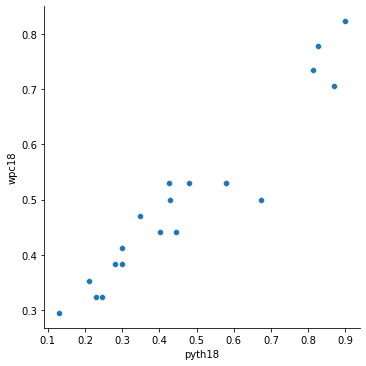

In [16]:
# Plot the data

sns.relplot(x="pyth18", y="wpc18", data =EPL18_18_total)

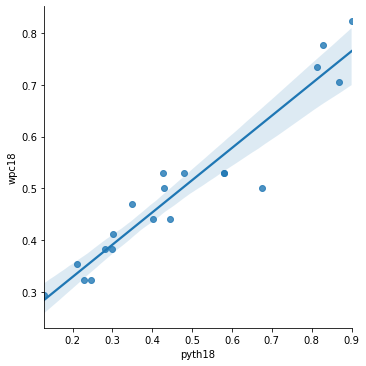

In [21]:
sns.lmplot(x="pyth18", y="wpc18", data =EPL18_18_total)

In [17]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data=EPL18_18_total).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc18   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           5.02e-11
Time:                        00:54:31   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth18         0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 8

In [18]:
EPL18_fir = EPL18_17_total[['team','wpc17', 'pyth17']]
EPL18_sec = EPL18_18_total[['team','wpc18', 'pyth18']]
EPL18_tot = pd.merge(EPL18_fir, EPL18_sec, on='team')
EPL18_tot.corr()

,wpc17,pyth17,wpc18,pyth18
wpc17,1.000000,0.968204,0.756573,0.745832
pyth17,0.968204,1.000000,0.795693,0.795331
wpc18,0.756573,0.795693,1.000000,0.955986
pyth18,0.745832,0.795331,0.955986,1.000000


## Plotting

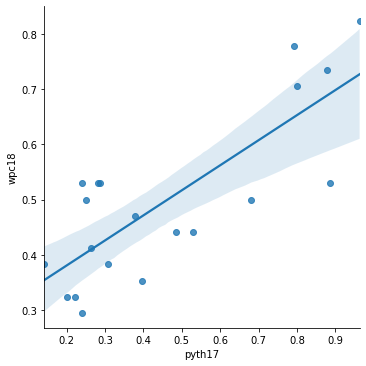

In [22]:
sns.lmplot(x="pyth17", y="wpc18", data =EPL18_tot)

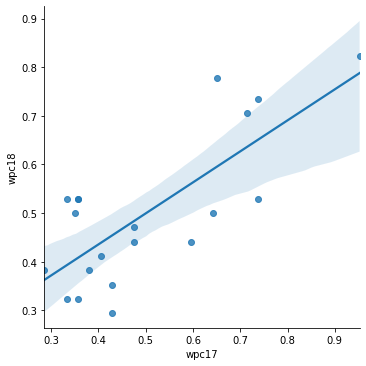

In [33]:
sns.lmplot(x="wpc17", y="wpc18", data =EPL18_tot)

## Conclusion

2017년도 데이터의 승률(wpc)와 피타고라스 기대치(pyth)의 상관계수는 0.968   
2018년도 데이터의 승률(wpc)와 피타고라스 기대치(pyth)의 상관계수는 0.956    

   
선형 회귀 분석을 시행한 결과:   
2017년 pyth에 대한 wpc의 회귀 계수는 0.655   
2018년 pyth에 대한 wpc의 회귀 계수는 0.624   
   
p값이 매우 작기 때문에(<0.00)   
null hypothesis를 reject 할 수 있다
   
2017년에는 pyth값이 1 증가할 때마다 승률이 0.655증가한다   
pyth값은 1보다 커질 수 없고, 0과 1사이의 값으로 존재한다   
ptyh값이 0.1 증가할 때마다 승률이 0.0655증가한다로 해석   


